In [28]:
import pandas as pd
import numpy as np

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Loading the cleaned data after preprocessing.
df = pd.read_csv("C:/Users/KRISHNA/Desktop/SHWETA/Fall 2024/Project/Cleaned_Loan_approval_dataset.csv")

In [31]:
df.head()

,LoanNumber,UserName,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,...,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,483449,BO965519,Existing_credit_customer,Income_expenses_verified,1,53,Female,EE,2125.0,2125.0,...,M,1000.0,969.16,1187.91,1155.84,433.60,1.0,500.0,590.95,0.0
1,378148,BOA9K172A,Existing_credit_customer,Income_unverified,1,50,Female,EE,3000.0,3000.0,...,M,1000.0,563.59,360.07,2436.41,2291.82,1.0,1800.0,445.26,1.0
2,451831,BO7971663,New_credit_Customer,Income_expenses_verified,1,44,Male,EE,10630.0,9100.0,...,M,1000.0,6537.00,1708.47,0.00,0.00,0.0,0.0,0.00,0.0
3,349381,BO76151K3,New_credit_Customer,Income_verified,6,42,Male,ES,1500.0,1500.0,...,M3,1000.0,464.73,355.92,1035.27,2833.83,0.0,0.0,0.00,1.0
4,443082,BOK423A63,New_credit_Customer,Income_expenses_verified,6,34,Female,ES,1595.0,1090.0,...,M5,1000.0,0.01,0.00,1089.99,4215.37,0.0,0.0,0.00,0.0


In [32]:
df.columns

Index(['LoanNumber', 'UserName', 'NewCreditCustomer', 'VerificationType',
       'LanguageCode', 'Age', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ExpectedReturn', 'ProbabilityOfDefault', 'Rating', 'Status',
       'Restructured', 'CreditScoreEsMicroL', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOf

In [33]:
df['Interest'].describe()

count    179235.000000
mean         34.345889
std          23.795960
min           2.000000
25%          19.410000
50%          30.000000
75%          39.800000
max         264.310000
Name: Interest, dtype: float64

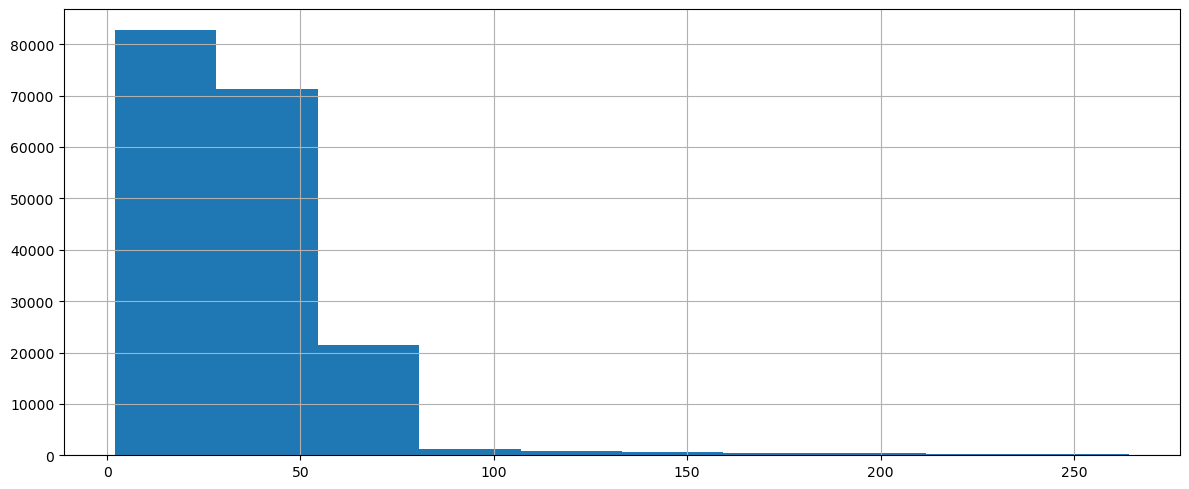

In [34]:
df['Interest'].hist(figsize=(12, 5), bins=10)
plt.tight_layout()
plt.show()

In [35]:
df['TotalIncome'] = (df['IncomeFromPrincipalEmployer'] + df['IncomeFromPension'] + 
                     df['IncomeFromFamilyAllowance'] + df['IncomeFromSocialWelfare'] + 
                     df['IncomeFromLeavePay'] + df['IncomeFromChildSupport'] + 
                     df['IncomeOther'])

In [36]:
df.drop(['IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal'],axis=1,inplace=True)

In [37]:
df['TotalLiabilities'] = df['LiabilitiesTotal'] + df['ExistingLiabilities'] + df['RefinanceLiabilities']

In [38]:
df.drop([ 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities'],axis=1,inplace=True)

In [39]:
df.columns

Index(['LoanNumber', 'UserName', 'NewCreditCustomer', 'VerificationType',
       'LanguageCode', 'Age', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ExpectedReturn', 'ProbabilityOfDefault', 'Rating', 'Status',
       'Restructured', 'CreditScoreEsMicroL', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'TotalIncome',
       'TotalLiabilities'],
      dtype='object')

In [40]:
# Selecting features for predicting interest rate.
interest_estimate_features = [
    'AppliedAmount', 'Amount','Interest','UseOfLoan',
    'NewCreditCustomer', 'Age', 'Gender', 'EmploymentStatus',
    'EmploymentDurationCurrentEmployer', 'OccupationArea', 'TotalIncome',
    'TotalLiabilities', 'DebtToIncome', 'FreeCash',
    'HomeOwnershipType', 'CreditScoreEsMicroL', 'CreditScoreEeMini',
    'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
    'ExpectedReturn', 'ProbabilityOfDefault', 'Rating','Restructured'
]
interest_df= df[interest_estimate_features]
interest_df.head()

,AppliedAmount,Amount,Interest,UseOfLoan,NewCreditCustomer,Age,Gender,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,...,FreeCash,HomeOwnershipType,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,ExpectedReturn,ProbabilityOfDefault,Rating,Restructured
0,2125.0,2125.0,20.97,Home_improvement,Existing_credit_customer,53,Female,Retiree,0,Other,...,10.92,Owner,M,1000.0,1.0,500.0,0.141145,0.122216,C,No
1,3000.0,3000.0,17.12,Business,Existing_credit_customer,50,Female,Entrepreneur,MoreThan5Years,Retail_and_wholesale,...,78.80,Owner,M,1000.0,1.0,1800.0,0.140436,0.036400,B,No
2,10630.0,9100.0,13.67,Business,New_credit_Customer,44,Male,Entrepreneur,UpTo3Years,Transport_and_warehousing,...,349.43,Mortgage,M,1000.0,0.0,0.0,0.113484,0.041300,A,No
3,1500.0,1500.0,40.40,Home_improvement,New_credit_Customer,42,Male,Fully-Employed,UpTo5Years,Other,...,449.47,Living_with_parents,M3,1000.0,0.0,0.0,0.183229,0.188726,F,No
4,1595.0,1090.0,68.39,Other,New_credit_Customer,34,Female,Retiree,0,Other,...,95.81,Tenant_pre_furnished_property,M5,1000.0,0.0,0.0,0.115240,0.749511,HR,No


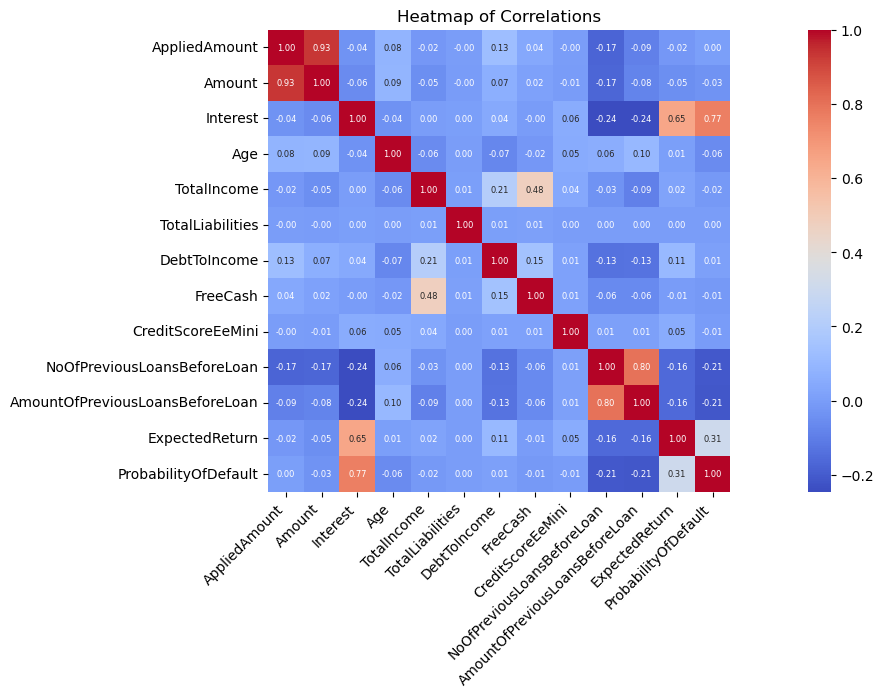

In [41]:
# Analysing the heatmap to find out relationships between the variables.

df1 = interest_df.select_dtypes(include=['number'])
# Calculating correlation matrix
correlation_matrix = df1.corr()

# Creating heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6},fmt=".2f", square=True)
plt.title('Heatmap of Correlations')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.show()

Observations
1. Interest rate positively co-relates with loan duration and and probability of default. Longer loans have higher interest rates pertaining to risk and higher probability of default leads to higher interest rates.
2. Higher interest rates lead to higher expected return.
3. Previous loan history like number of previous loans and their amounts negatively affects the interest rates.
4. Older people tend to have more risk of repaying which leads to higher interest rates.
5. Total income has some impact on the interest rate.

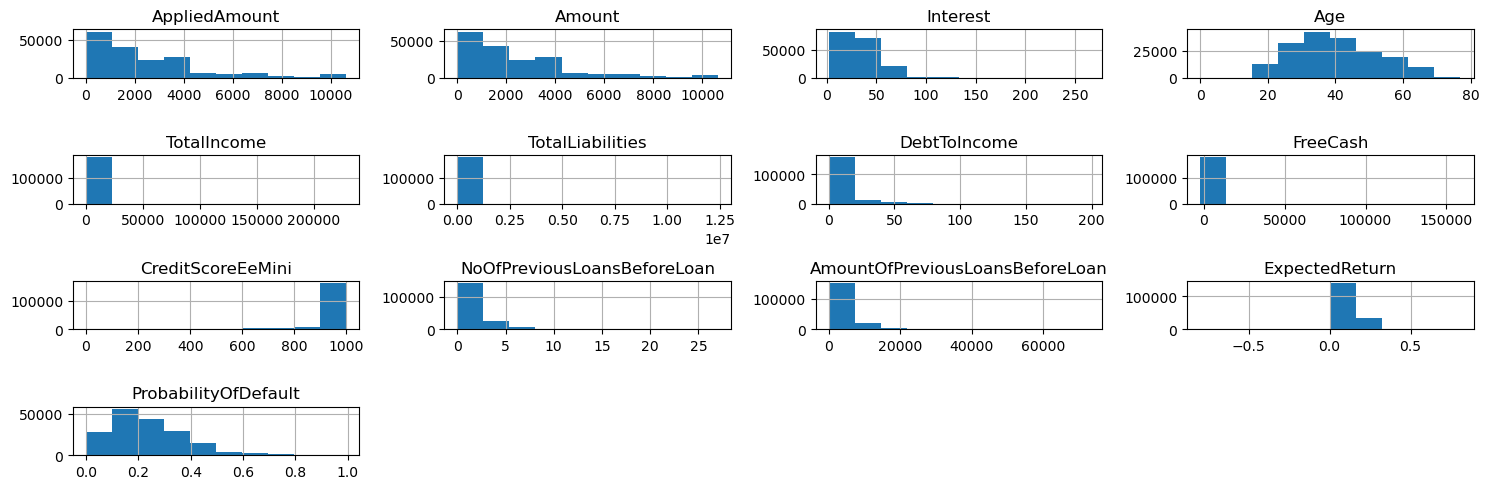

In [42]:
# Plotting histograms for all numerical variables to check the distribution of the variables.
df1.hist(figsize=(15, 5), bins=10)
plt.tight_layout()
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Getting the categorical columns.
categorical_columns = interest_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Loop through the categorical columns and apply LabelEncoder
for column in categorical_columns:
    interest_df[column] = label_encoder.fit_transform(interest_df[column])

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_18888\815741721.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_df[column] = label_encoder.fit_transform(interest_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_18888\815741721.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_df[column] = label_encoder.fit_transform(interest_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_18888\815741721.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [44]:
# Saving the LabelEncoder object.
import joblib
joblib.dump(label_encoder, 'interest_encoder.pkl')

['interest_encoder.pkl']

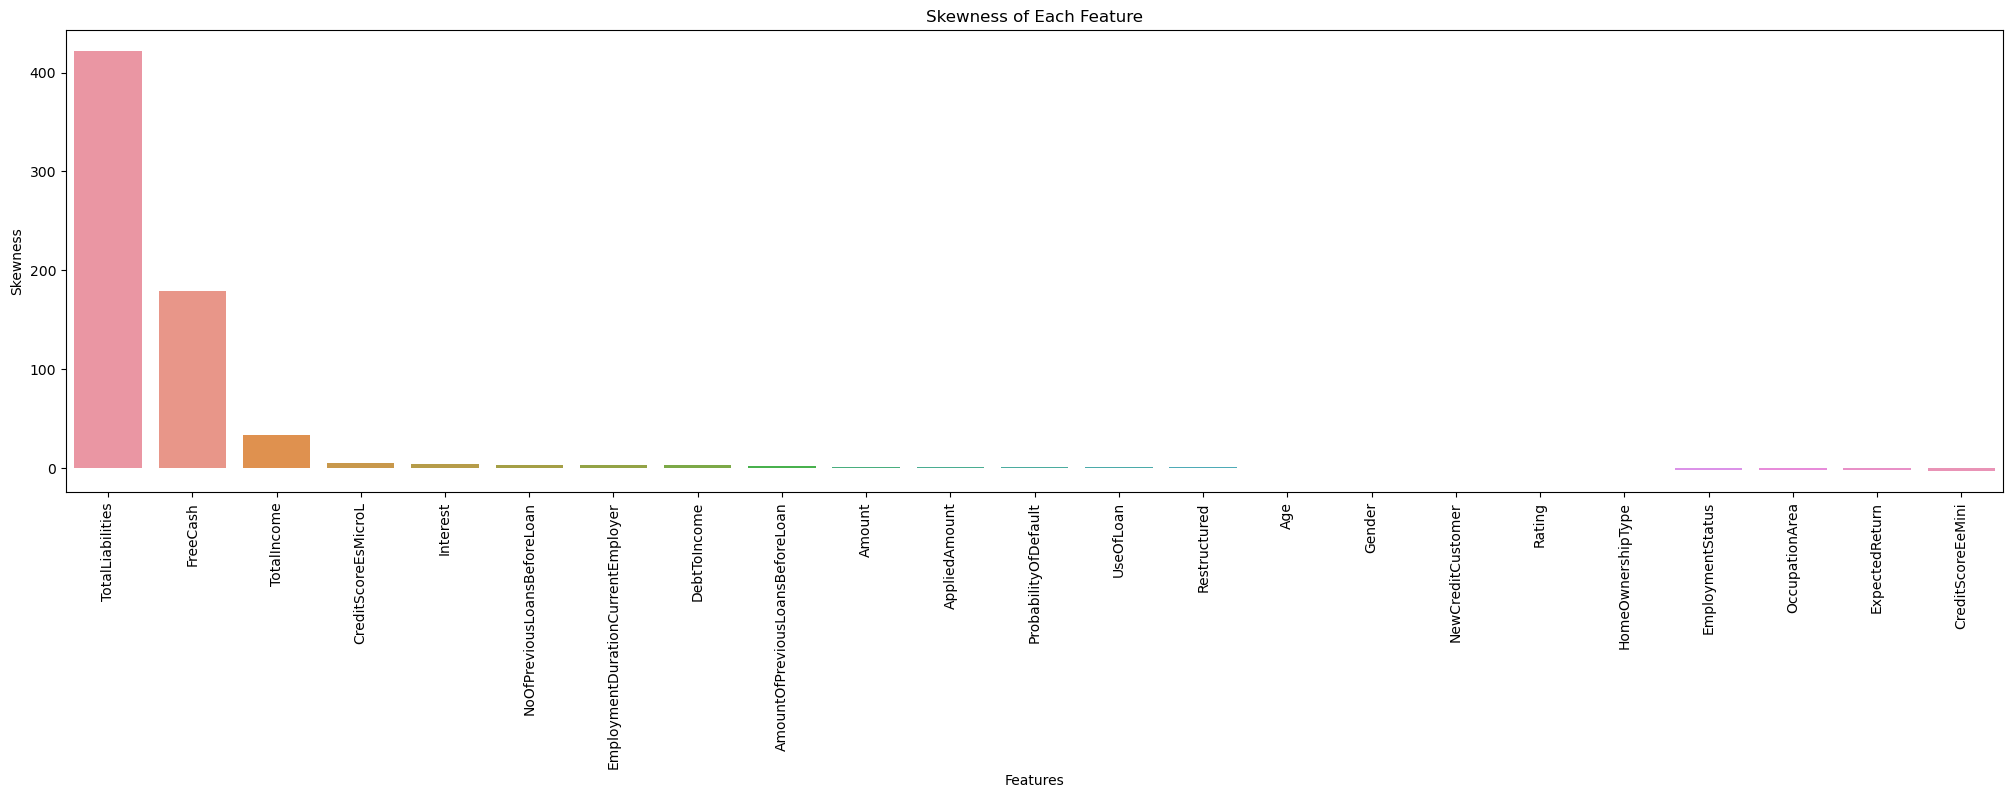

In [45]:
# Checking skewness of all the columns.
skewed_features = interest_df.apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting the skewness values
plt.figure(figsize=(25, 6))
sns.barplot(x=skewed_features.index, y=skewed_features.values)
plt.xticks(rotation=90) 
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.show()

In [46]:
threshold = 2

# Selecting features to transform based on skewness
features_to_transform = skewed_features[skewed_features.abs() > threshold].index.tolist()

# Apply transformations
for column in features_to_transform:
    if skewed_features[column] > 0:
        if (interest_df[column] >= 0).all(): 
            interest_df[column] = np.log1p(interest_df[column])
        else:
            min_value = interest_df[column].min()
            interest_df[column] = interest_df[column] + abs(min_value) + 1 
            interest_df[column] = np.log1p(interest_df[column])

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_18888\1076270169.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_df[column] = np.log1p(interest_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_18888\1076270169.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_df[column] = interest_df[column] + abs(min_value) + 1
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_18888\1076270169.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

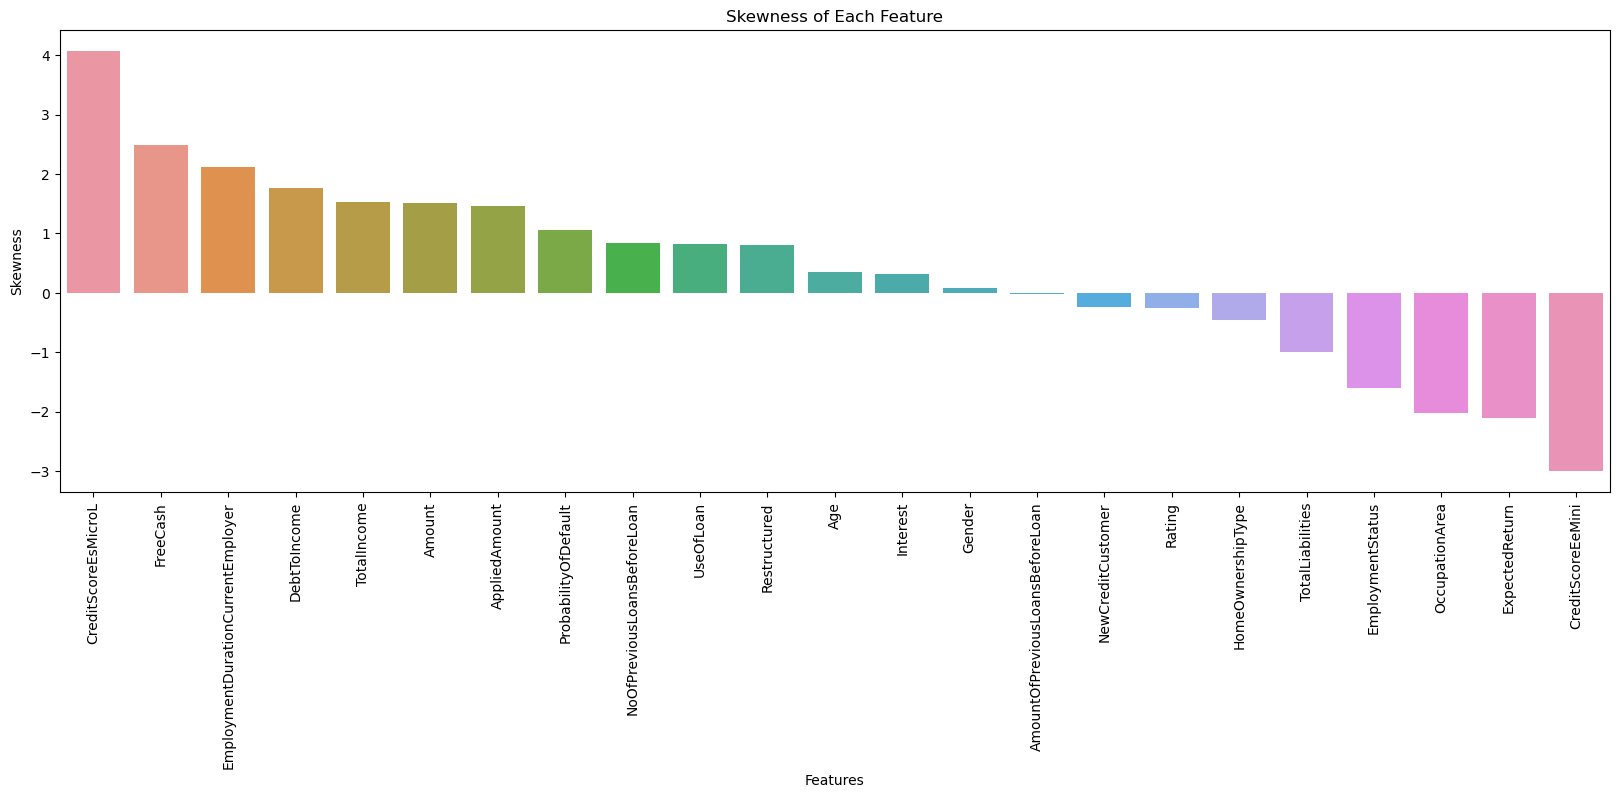

In [47]:
# Checking the skewness of each column after perfroming the transformations.
skewed_features = interest_df.apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting the skewness values.
plt.figure(figsize=(20, 6))
sns.barplot(x=skewed_features.index, y=skewed_features.values)
plt.xticks(rotation=90)  
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.show()

In [48]:
# Saving the data.
interest_df.to_csv('Cleaned_interest_amount_dataset.csv', index=False)

In [49]:
# Performing normalization of data using Robust Scaler.

from sklearn.preprocessing import RobustScaler
X = interest_df.drop('Interest',axis=1)
scaler = RobustScaler()  
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = interest_df[['Interest']] 
y = scaler.fit_transform(y)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

C:\Users\KRISHNA\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Feature,Importance
20,Rating,0.604113
18,ExpectedReturn,0.345244
19,ProbabilityOfDefault,0.023871
9,TotalIncome,0.005415
6,EmploymentStatus,0.002681
0,AppliedAmount,0.002445
12,FreeCash,0.002271
1,Amount,0.002140
5,Gender,0.001980
4,Age,0.001810


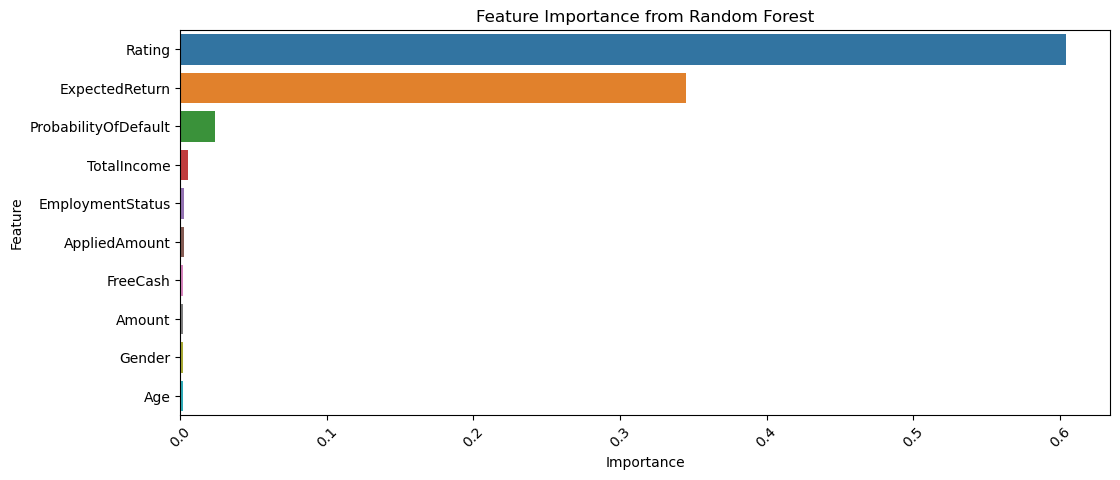

In [51]:
# Plotting the top 10 feature importances.
top_n = 10
top_features = feature_importance_df.head(top_n)
plt.figure(figsize=(12, 5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=45) 
plt.show()